# rocketman lab

In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing import image
from keras.models import model_from_json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
# load json and create model
json_file = open('C:\\Data\\Dev-Data\\music\\model\\model.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

# load weights into new model
model.load_weights("C:\\Data\\Dev-Data\\music\\model\\model.h5")

# load model columns
train = pd.read_csv("C:\\Data\\Dev-Data\\music\\model\\model-columns.csv")

print("Loaded model from disk")



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


01_0_18.PNG
-- category_other (0.816)
-- category_12 (0.0656)
-- category_13 (0.0558)


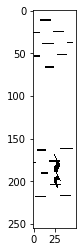


01_0_19.PNG
-- category_other (1.0)
-- category_11 (7.18e-06)
-- category_15 (5.28e-06)


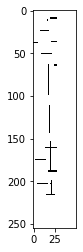


01_0_2.PNG
-- category_other (0.997)
-- category_15 (0.000464)
-- category_10 (0.000262)


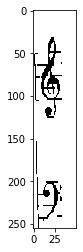


01_0_20.PNG
-- category_12 (0.782)
-- category_11 (0.174)
-- category_10 (0.0324)


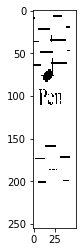


01_0_21.PNG
-- category_other (0.966)
-- category_12 (0.0111)
-- category_11 (0.0103)


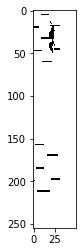


01_0_22.PNG
-- category_other (0.992)
-- category_15 (0.00184)
-- category_11 (0.00163)


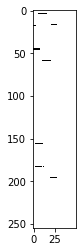


01_0_23.PNG
-- category_other (1.0)
-- category_9 (0.0)
-- category_8 (0.0)


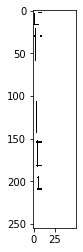


01_0_24.PNG
-- category_12 (0.982)
-- category_11 (0.00635)
-- category_13 (0.00524)


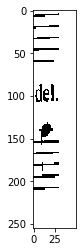


01_0_25.PNG
-- category_other (0.993)
-- category_12 (0.00215)
-- category_11 (0.00173)


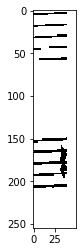


01_0_3.PNG
-- category_other (0.989)
-- category_15 (0.00682)
-- category_10 (0.000857)


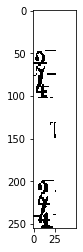

In [3]:
img_path = "C:\\Data\\Dev-Data\\music\\notes\\"
filenames = os.listdir(img_path)

for i in range (10,20):
    filename = filenames[i]
    print (filename)
    img = image.load_img(img_path+filename,target_size=(255,50,3))
    img = image.img_to_array(img)
    img = img/255
  
    classes = np.array(train.columns[3:])
    proba = model.predict(img.reshape(1,255,50,3))
    top_3 = np.argsort(proba[0])[:-4:-1]
    for i in range(3):
        print("-- {}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))    
    
    plt.imshow (img)
    plt.show()        
    print ()

In [4]:
# play sound when done
from IPython.display import Audio, display
display(Audio('../sounds/bowl.wav', autoplay=True))